In [28]:
import pandas as pd
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn import tree

df = pd.read_csv("dataset/preprocessed.csv")
df.shape

(762106, 44)

In [29]:
df = df.drop(df[df.target == -1].index)
df.shape

(762094, 44)

In [30]:
# Separate input features and target
y = df.target

In [31]:
X = df.drop('target', axis = 1)

In [32]:
# setting up testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


### Train the model without re-sampling

In [33]:
# Train the model

dc = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 23).fit(X_train, y_train)
dc_pred = dc.predict(X_test)

In [34]:
# Performance results

print("Accuracy: \t", accuracy_score(y_test, dc_pred))
print("F1 Score: \t", f1_score(y_test, dc_pred, average = 'weighted'))
print("Precision:\t", precision_score(y_test, dc_pred, average = 'weighted'))
print("Recall:   \t", recall_score(y_test, dc_pred, average = 'weighted'))

Accuracy: 	 0.5341269341395309
F1 Score: 	 0.5342081659486912
Precision:	 0.5342999646426477
Recall:   	 0.5341269341395309


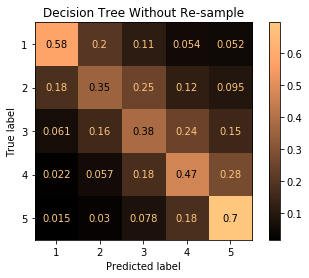

In [35]:
# Plot normalized confusion matrix

import matplotlib.pyplot as plt

classes = ["1", "2", "3", "4", "5"]
title = "Decision Tree Without Re-sample"
disp = plot_confusion_matrix(dc, X_test, y_test, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)
plt.show()

### Train the model with re-sampling

In [36]:
# Re-sample the training set

sm = SMOTEENN(random_state = 27, n_jobs = -1)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [37]:
print(X_train.shape)

(426472, 43)


In [38]:
# Train the model

dc_sampled = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 23).fit(X_train, y_train)
dc_sampled_pred = dc_sampled.predict(X_test)

In [39]:
# Performance results

print("Accuracy: \t", accuracy_score(y_test, dc_sampled_pred))
print("F1 Score: \t", f1_score(y_test, dc_sampled_pred, average = 'weighted'))
print("Precision:\t", precision_score(y_test, dc_sampled_pred, average = 'weighted'))
print("Recall:   \t", recall_score(y_test, dc_sampled_pred, average = 'weighted'))

Accuracy: 	 0.55129537486091
F1 Score: 	 0.5602301186688726
Precision:	 0.5792080437139268
Recall:   	 0.55129537486091


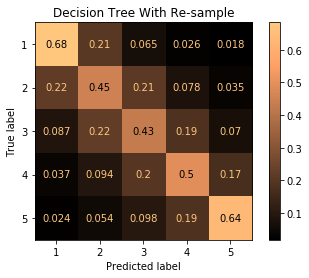

In [40]:
# Plot normalized confusion matrix

classes = ["1", "2", "3", "4", "5"]
title = "Decision Tree With Re-sample"
disp = plot_confusion_matrix(dc_sampled, X_test, y_test, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)
plt.show()
